In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf

In [2]:
pwd

'C:\\Users\\Admin\\Python&Quants\\NIDA_DeepLearning'

In [3]:
df = pd.read_excel('BCH Historical Price 10Y.xlsx',sheet_name='Daily',index_col='Date')

In [4]:
df = df.dropna()

In [5]:
df.head()

,Last Price,Volume
Date,,
2022-03-21,21.8,31993000
2022-03-18,21.2,23403892
2022-03-17,21.0,21165356
2022-03-16,21.0,21344752
2022-03-15,21.0,35639216


In [6]:
df['return'] = df['Last Price'].pct_change()

In [7]:
df2 = df[['return']].dropna()

In [8]:
df2.head()

,return
Date,
2022-03-18,-0.027523
2022-03-17,-0.009434
2022-03-16,0.000000
2022-03-15,0.000000
2022-03-14,-0.004762


In [9]:
df2.mean()

return   -0.000358
dtype: float64

In [12]:
df2.std()*np.sqrt(365)

return    0.375578
dtype: float64

In [6]:
df1 = df[['Last Price']]

In [7]:
df1.mean()*365

Last Price    4591.077118
dtype: float64

In [8]:
df1.std()*np.sqrt(365)

Last Price    89.343578
dtype: float64

In [9]:
df1.skew()

Last Price    0.283548
dtype: float64

In [10]:
df1.kurt()

Last Price   -0.848761
dtype: float64

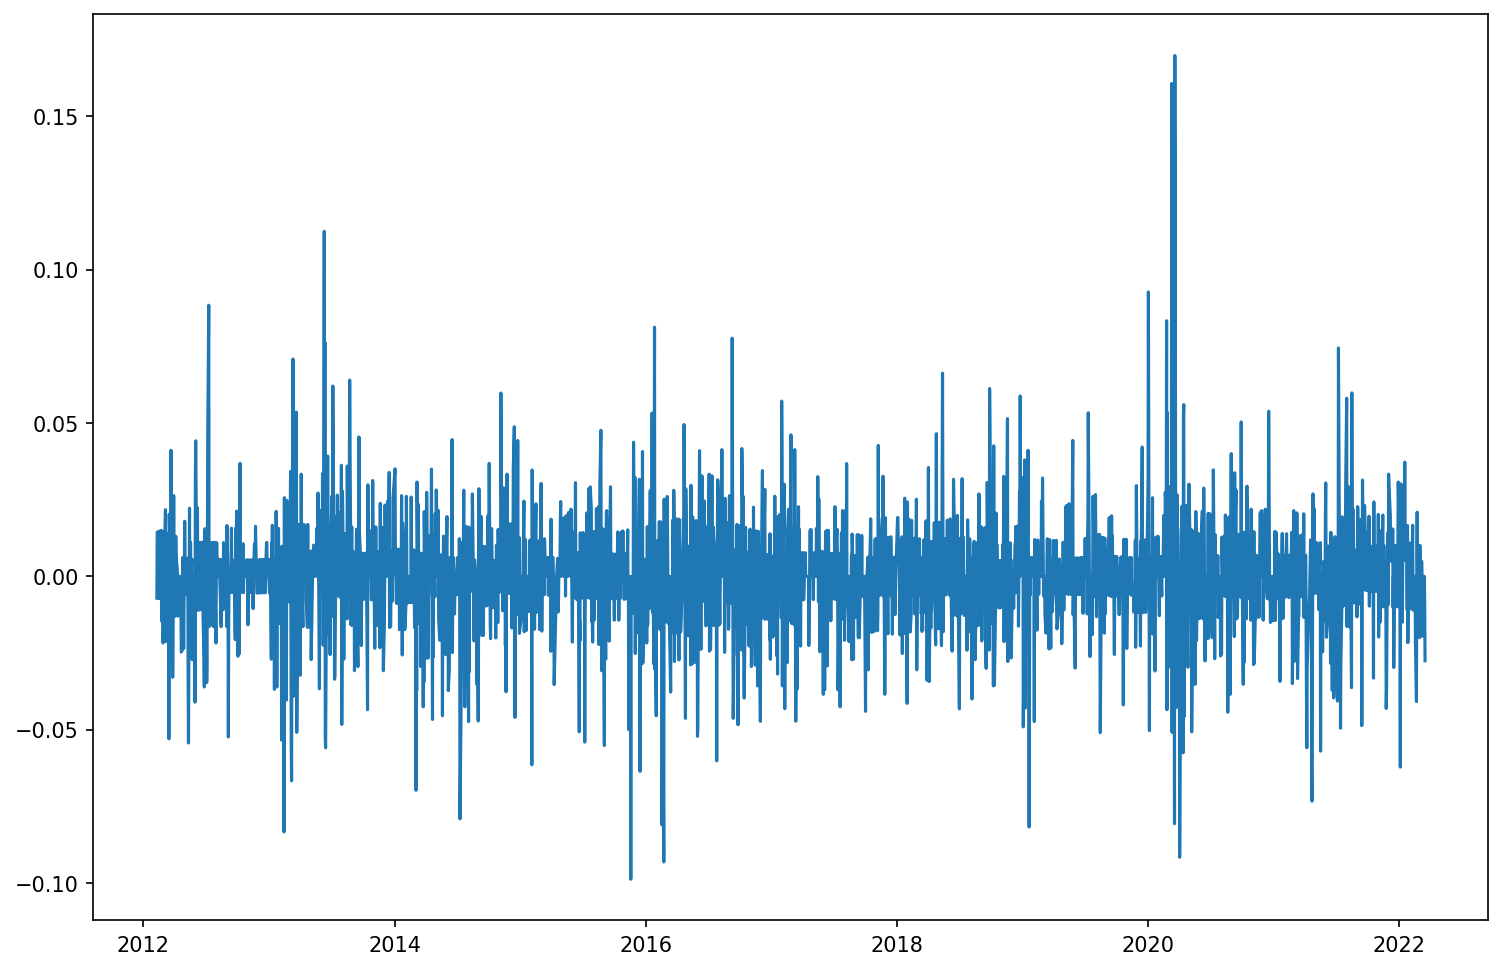

In [13]:
plt.figure(figsize=(12,8),dpi = 150)
plt.plot(df2)

E:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


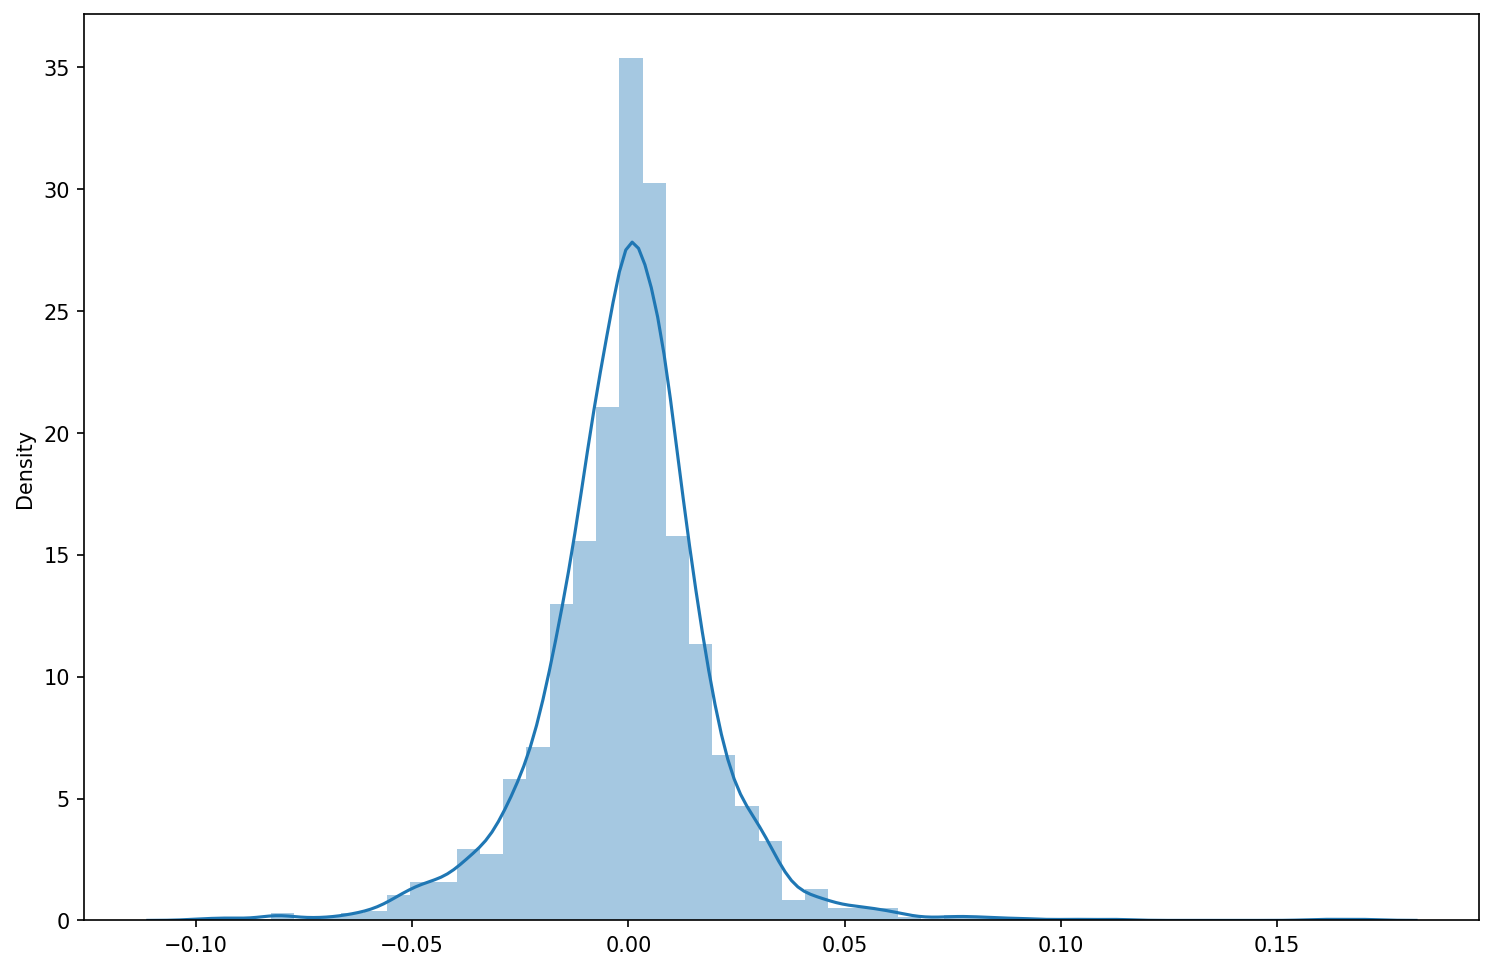

In [14]:
plt.figure(figsize=(12,8),dpi = 150)
sns.distplot(df2);

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
return,2466.0,-0.000358,0.019659,-0.098765,-0.009324,0.0,0.008734,0.169811


# Train Test Split

In [19]:
len(df2)

2466

In [20]:
np.array(df2['return']).shape

(2466,)

In [21]:
len(df2)

2466

In [23]:
train_len = len(df2)-244
train = df2.iloc[:train_len]
test = df2.iloc[train_len:]
print(train_len)
print(len(test))

2222
244


# Standard Scaler

In [24]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [25]:
scaler.fit(train)

StandardScaler()

In [26]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

In [27]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [28]:
n_input = 20
n_features=1
generator = TimeseriesGenerator(scaled_train,scaled_train, length=n_input, batch_size=1)

In [29]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
nadam = tf.keras.optimizers.Nadam(learning_rate=0.0001)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

In [30]:
# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mse', optimizer=nadam, metrics=['mean_absolute_error'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [32]:
# fit model
model.fit_generator(generator,epochs=30)

Epoch 1/30


<ipython-input-32-ad990dc219c6>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=30)


2202/2202 [==============================] - 13s 5ms/step - loss: 1.0062 - mean_absolute_error: 0.6929
Epoch 2/30
2202/2202 [==============================] - 12s 5ms/step - loss: 1.0021 - mean_absolute_error: 0.6931
Epoch 3/30
2202/2202 [==============================] - 12s 5ms/step - loss: 1.0020 - mean_absolute_error: 0.6940
Epoch 4/30
2202/2202 [==============================] - 12s 5ms/step - loss: 1.0011 - mean_absolute_error: 0.6936
Epoch 5/30
2202/2202 [==============================] - 12s 5ms/step - loss: 1.0010 - mean_absolute_error: 0.6941
Epoch 6/30
2202/2202 [==============================] - 12s 5ms/step - loss: 0.9991 - mean_absolute_error: 0.6928
Epoch 7/30
2202/2202 [==============================] - 11s 5ms/step - loss: 0.9983 - mean_absolute_error: 0.6932
Epoch 8/30
2202/2202 [==============================] - 12s 5ms/step - loss: 0.9988 - mean_absolute_error: 0.6929
Epoch 9/30
2202/2202 [==============================] - 12s 5ms/step - loss: 0.9977 - mean_absolute

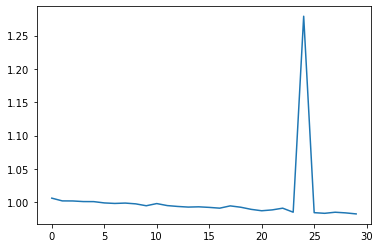

In [33]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [34]:
first_eval_batch = scaled_train[-12:]

In [35]:
np.array(first_eval_batch).reshape(1,12,1)

array([[[ 1.25073282],
        [-1.99971881],
        [ 0.43257729],
        [ 0.42908164],
        [-1.63707887],
        [ 1.29304508],
        [-4.14672474],
        [-0.44069974],
        [-2.27671212],
        [-0.94686014],
        [ 0.50249029],
        [-2.65241904]]])

In [36]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [37]:
preds = scaler.inverse_transform(test_predictions)

In [38]:
len(preds)

244

In [39]:
test

,return
Date,
2013-02-05,0.000000
2013-02-04,-0.005128
2013-02-01,0.005155
2013-01-31,-0.015385
2013-01-30,0.005208
...,...
2012-02-15,0.000000
2012-02-14,-0.007246
2012-02-13,0.014599


In [40]:
test['Predictions'] = preds

<ipython-input-40-3f875448906a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = preds


In [41]:
test

,return,Predictions
Date,,
2013-02-05,0.000000,0.005172
2013-02-04,-0.005128,0.002655
2013-02-01,0.005155,0.000922
2013-01-31,-0.015385,-0.000114
2013-01-30,0.005208,-0.000538
...,...,...
2012-02-15,0.000000,0.000236
2012-02-14,-0.007246,0.000236
2012-02-13,0.014599,0.000236


In [43]:
test.to_excel('test_return.xlsx')

<AxesSubplot:xlabel='Date'>

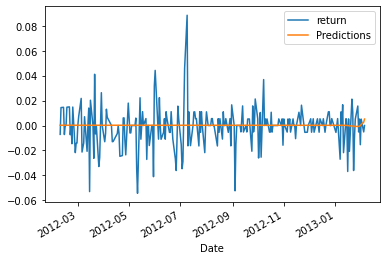

In [42]:
test.plot()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
mean_squared_error(test['Last Price'],test['Predictions'])

1.1151440263829708

In [43]:
mean_absolute_error(test['Last Price'],test['Predictions'])

0.824689531482634